### 指定数据

此模块有3个需要自己定义的参数

1. `mydir`: 数据存放的路径。
2. `labelf`: 每个样本的标注信息文件。
3. `labels`: 要让AI系统学习的目标，例如肿瘤的良恶性、T-stage等。

In [1]:
import os
import pandas as pd
from IPython.display import display
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'
from onekey_algo import OnekeyDS as okds
from onekey_algo import get_param_in_cwd

os.makedirs('img', exist_ok=True)
os.makedirs('results', exist_ok=True)
os.makedirs('features', exist_ok=True)

# 设置任务Task前缀
task_type = 'Path_'
# 设置数据目录
# mydir = r'你自己数据的路径'
mydir = get_param_in_cwd('radio_dir')
if mydir == okds.ct:
    print(f'正在使用Onekey数据：{okds.ct}，如果不符合预期，请修改目录位置！')
# 对应的标签文件
group_info = get_param_in_cwd('dataset_column') or 'group'
labelf = get_param_in_cwd('label_file') or os.path.join(mydir, 'label.csv')
# 读取标签数据列名
labels = [get_param_in_cwd('task_column') or 'label']

In [2]:
from collections import namedtuple
import onekey_algo.custom.components as okcomp
from onekey_algo import OnekeyDS as okds
from onekey_algo.custom.utils import print_join_info
from onekey_algo import get_param_in_cwd

import pandas as pd
import numpy as np
import os
os.makedirs('img', exist_ok=True)
os.makedirs('features', exist_ok=True)


prob_histo = pd.read_csv('features/path_prob_histogram.csv')
prob_tfidf = pd.read_csv('features/path_prob_tfidf.csv')
prob = pd.merge(prob_histo, prob_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
prob['ID'] = prob['ID'].astype(str)

pred_histo = pd.read_csv('features/path_pred_histogram.csv')
pred_tfidf = pd.read_csv('features/path_pred_tfidf.csv')
pred = pd.merge(pred_histo, pred_tfidf, on='ID', how='inner', suffixes=['_histo', '_tfidf'])
pred['ID'] = pred['ID'].astype(str)

rad_data = pd.merge(prob, pred, on='ID', how='inner')
rad_data['ID'] = rad_data['ID'].map(lambda x: f"{x}.nii.gz")
rad_data.to_csv('features/path_features.csv', index=False, header=True)
labels = ['label']
featrues_not_use = ['ID']
rad_data

,ID,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,...,prob095,prob096,prob097,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1
0,1.nii.gz,1.590e-04,6.359e-04,5.564e-04,3.180e-04,4.769e-04,7.949e-05,5.564e-04,2.385e-04,3.180e-04,...,8.058e-03,1.075e-02,1.217e-02,2.400e-02,4.534e-02,9.984e-01,0.018,0.982,0.019,1.000
1,10.nii.gz,7.556e-01,7.050e-02,2.577e-02,1.807e-02,1.333e-02,1.007e-02,5.924e-03,6.517e-03,5.924e-03,...,0.000e+00,6.301e-04,0.000e+00,3.180e-04,6.361e-04,0.000e+00,0.974,0.026,1.000,0.027
2,100.nii.gz,8.578e-01,4.779e-02,2.046e-02,8.861e-03,9.238e-03,4.713e-03,4.619e-03,2.451e-03,3.111e-03,...,0.000e+00,1.773e-04,1.781e-04,8.946e-05,0.000e+00,1.849e-04,0.991,0.009,1.000,0.009
3,101.nii.gz,7.213e-01,8.862e-02,3.161e-02,2.041e-02,1.309e-02,1.082e-02,9.523e-03,7.126e-03,5.118e-03,...,5.920e-04,3.597e-04,5.059e-04,5.809e-04,5.809e-04,3.002e-04,0.977,0.023,1.000,0.023
4,102.nii.gz,9.483e-04,1.159e-03,1.264e-03,8.429e-04,1.264e-03,9.483e-04,6.322e-04,1.054e-03,7.375e-04,...,2.112e-02,3.830e-02,3.602e-02,8.126e-02,1.362e-01,9.846e-01,0.049,0.951,0.051,0.999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,95.nii.gz,7.001e-01,8.259e-02,3.448e-02,2.055e-02,1.607e-02,1.170e-02,8.849e-03,7.628e-03,6.713e-03,...,3.591e-04,9.310e-04,4.677e-04,1.175e-04,9.398e-04,4.856e-04,0.969,0.031,1.000,0.032
208,96.nii.gz,4.083e-01,7.318e-02,3.361e-02,1.929e-02,2.068e-02,1.322e-02,1.352e-02,9.645e-03,9.247e-03,...,1.474e-02,1.797e-02,2.055e-02,3.106e-02,3.994e-02,8.075e-02,0.754,0.246,0.951,0.310
209,97.nii.gz,6.875e-01,9.105e-02,3.474e-02,2.110e-02,1.629e-02,1.171e-02,1.003e-02,9.467e-03,8.103e-03,...,5.758e-04,7.464e-04,7.499e-04,7.534e-04,5.651e-04,6.813e-04,0.969,0.031,0.999,0.032
210,98.nii.gz,1.004e-01,3.913e-02,2.059e-02,1.807e-02,1.132e-02,9.115e-03,8.801e-03,5.815e-03,5.658e-03,...,5.673e-02,7.689e-02,8.898e-02,1.510e-01,2.350e-01,8.116e-01,0.368,0.632,0.504,0.864


## 标注数据

数据以csv格式进行存储，这里如果是其他格式，可以使用自定义函数读取出每个样本的结果。

要求label_data为一个`DataFrame`格式，包括ID列以及后续的labels列，可以是多列，支持Multi-Task。

In [3]:
from onekey_algo.custom.components.comp1 import fillna
label_data = pd.read_csv(get_param_in_cwd('survival_file'))
label_data['ID'] = label_data['ID'].map(lambda x: f"{x}.nii.gz" if not (f"{x}".endswith('.nii.gz') or  f"{x}".endswith('.nii')) else x)
group_info = pd.read_csv('data/path_ids.csv')[['ID', 'group']]
label_data = pd.merge(label_data, group_info, on='ID', how='inner')
# label_data = label_data[~label_data['ID'].isin({'146.nii.gz', '159.nii.gz', '113.nii.gz', '131.nii.gz', '8.nii.gz', '135.nii.gz', '25.nii.gz', '132.nii.gz', '212.nii.gz', '107.nii.gz'})]
label_data['group'] = label_data['group'].map(lambda x: x if not pd.isna(x) else 'test')
label_data

,ID,OSTime,OS,group
0,1.nii.gz,4,1,train
1,2.nii.gz,48,1,train
2,3.nii.gz,15,1,train
3,4.nii.gz,8,1,train
4,5.nii.gz,18,1,test
...,...,...,...,...
189,207.nii.gz,3,1,train
190,208.nii.gz,10,1,train
191,209.nii.gz,43,0,train
192,210.nii.gz,3,1,train


## 特征拼接 

将标注数据`label_data`与`rad_data`进行合并，得到训练数据。

**注意：** 
1. 需要删掉ID这一列
2. 如果发现数据少了，需要自行检查数据是否匹配。

In [4]:
event_col = get_param_in_cwd('event_col', 'label')
duration_col=get_param_in_cwd('duration_col', 'time')

combined_data = pd.merge(rad_data, label_data, on=['ID'], how='inner')
print(combined_data[event_col].value_counts())
combined_data

1    140
0     54
Name: OS, dtype: int64


,ID,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,...,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1,OSTime,OS,group
0,1.nii.gz,1.590e-04,6.359e-04,5.564e-04,3.180e-04,4.769e-04,7.949e-05,5.564e-04,2.385e-04,3.180e-04,...,2.400e-02,4.534e-02,9.984e-01,0.018,0.982,0.019,1.000,4,1,train
1,10.nii.gz,7.556e-01,7.050e-02,2.577e-02,1.807e-02,1.333e-02,1.007e-02,5.924e-03,6.517e-03,5.924e-03,...,3.180e-04,6.361e-04,0.000e+00,0.974,0.026,1.000,0.027,18,1,train
2,100.nii.gz,8.578e-01,4.779e-02,2.046e-02,8.861e-03,9.238e-03,4.713e-03,4.619e-03,2.451e-03,3.111e-03,...,8.946e-05,0.000e+00,1.849e-04,0.991,0.009,1.000,0.009,27,0,train
3,101.nii.gz,7.213e-01,8.862e-02,3.161e-02,2.041e-02,1.309e-02,1.082e-02,9.523e-03,7.126e-03,5.118e-03,...,5.809e-04,5.809e-04,3.002e-04,0.977,0.023,1.000,0.023,15,1,train
4,102.nii.gz,9.483e-04,1.159e-03,1.264e-03,8.429e-04,1.264e-03,9.483e-04,6.322e-04,1.054e-03,7.375e-04,...,8.126e-02,1.362e-01,9.846e-01,0.049,0.951,0.051,0.999,3,1,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,94.nii.gz,5.518e-04,1.324e-03,4.414e-04,1.214e-03,8.828e-04,1.104e-03,1.214e-03,1.214e-03,9.932e-04,...,1.022e-01,1.836e-01,9.714e-01,0.059,0.941,0.063,0.998,11,1,train
190,95.nii.gz,7.001e-01,8.259e-02,3.448e-02,2.055e-02,1.607e-02,1.170e-02,8.849e-03,7.628e-03,6.713e-03,...,1.175e-04,9.398e-04,4.856e-04,0.969,0.031,1.000,0.032,13,1,train
191,96.nii.gz,4.083e-01,7.318e-02,3.361e-02,1.929e-02,2.068e-02,1.322e-02,1.352e-02,9.645e-03,9.247e-03,...,3.106e-02,3.994e-02,8.075e-02,0.754,0.246,0.951,0.310,12,1,test
192,97.nii.gz,6.875e-01,9.105e-02,3.474e-02,2.110e-02,1.629e-02,1.171e-02,1.003e-02,9.467e-03,8.103e-03,...,7.534e-04,5.651e-04,6.813e-04,0.969,0.031,0.999,0.032,27,1,train


## 正则化

`normalize_df` 为onekey中正则化的API，将数据变化到0均值1方差。正则化的方法为

$column = \frac{column - mean}{std}$

In [5]:
from onekey_algo.custom.components.comp1 import normalize_df
data = normalize_df(combined_data, not_norm=['ID', event_col, duration_col], group='group', use_train=True)
data = data.dropna(axis=1)
data.describe()

[2024-03-13 21:59:09 - comp1.py: 186]	INFO	正在使用训练集预定数据进行标准化。


,prob-0.0,prob-0.01,prob-0.02,prob-0.03,prob-0.04,prob-0.05,prob-0.06,prob-0.07,prob-0.08,prob-0.09,...,prob097,prob098,prob099,prob10,pred-0,pred-1,pred0,pred1,OSTime,OS
count,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,194.000,...,194.000,194.000,1.940e+02,194.000,194.000,194.000,194.000,194.000,194.000,194.000
mean,-0.111,0.065,0.126,0.127,0.179,0.172,0.183,0.241,0.279,0.214,...,0.393,0.421,3.678e-01,0.001,0.040,-0.040,0.099,0.020,13.562,0.722
std,0.904,1.004,1.066,1.062,1.128,1.079,1.103,1.210,1.282,1.136,...,1.358,1.398,1.318e+00,0.948,0.911,0.911,0.943,0.927,12.410,0.449
min,-0.795,-0.780,-0.770,-0.766,-0.780,-0.685,-0.723,-0.793,-0.821,-0.707,...,-0.662,-0.805,-8.276e-01,-1.212,-0.916,-1.255,-0.926,-1.269,0.000,0.000
25%,-0.795,-0.776,-0.765,-0.751,-0.768,-0.668,-0.691,-0.754,-0.778,-0.667,...,-0.608,-0.757,-8.058e-01,-1.209,-0.858,-1.139,-0.869,-1.149,5.000,0.000
50%,-0.793,-0.748,-0.701,-0.646,-0.631,-0.525,-0.507,-0.489,-0.519,-0.317,...,-0.117,-0.029,-4.387e-04,0.710,-0.322,0.322,-0.186,0.708,9.000,1.000
75%,0.800,1.031,1.185,1.021,1.257,0.938,0.971,1.148,1.200,1.015,...,0.680,0.980,8.574e-01,0.837,1.139,0.858,1.174,0.845,17.000,1.000
max,1.735,2.227,2.477,3.317,3.201,6.876,6.007,3.734,4.358,6.920,...,6.058,5.156,4.936e+00,0.853,1.255,0.916,1.178,0.846,61.000,1.000


In [6]:
from onekey_algo.custom.components.comp1 import normalize_df, select_feature

corr_name = get_param_in_cwd('corr_name', 'pearson')
if os.path.exists(f'features/{task_type}_features_sel.csv') and False:
    data = pd.read_csv(f'features/{task_type}_features_sel.csv', header=0)
else:
    sel_feature = select_feature(data[[c for c in data.columns if c not in [event_col, duration_col]]].corr(corr_name), 
                                 threshold=0.8, topn=10, verbose=False)
    data = data[['ID'] + sel_feature + [event_col, duration_col, 'group']]
    data.to_csv(f'features/{task_type}_features_sel.csv', header=True, index=False)
data

,ID,prob-0.53,prob002,prob049,prob05,prob075,prob099,pred1,OS,OSTime,group
13,112.nii.gz,2.562e+00,7.545,22.219,23.540,1.474,2.593,0.180,0,24,test
14,114.nii.gz,8.029e-01,-0.494,2.914,1.152,0.151,1.955,0.838,1,5,test
17,117.nii.gz,1.621e+00,1.548,9.542,6.463,0.249,1.622,0.517,1,19,test
19,119.nii.gz,2.843e+00,1.638,8.045,8.914,0.563,3.028,0.718,1,4,test
25,124.nii.gz,2.240e+00,5.135,11.780,7.843,0.867,1.594,0.279,1,2,test
...,...,...,...,...,...,...,...,...,...,...,...
187,92.nii.gz,-3.821e-01,1.271,-0.410,-0.203,-0.157,-0.824,-1.211,1,16,train
188,93.nii.gz,3.685e-01,2.241,1.010,0.987,-0.129,-0.813,-1.132,1,24,train
189,94.nii.gz,1.865e-01,-0.687,2.570,0.820,0.085,1.461,0.842,1,11,train
190,95.nii.gz,-5.788e-02,1.021,0.517,-0.029,-0.192,-0.816,-1.211,1,13,train


## 构建数据

将样本的训练数据X与监督信息y分离出来，并且对训练数据进行划分，一般的划分原则为80%-20%

In [23]:
import numpy as np
import onekey_algo.custom.components as okcomp
from collections import OrderedDict

group_info = get_param_in_cwd('group_info', 'group')
train_data = data[(data[group_info] == 'train')]

# subsets = [s for s in label_data['group'].value_counts().index if s != 'train']
subsets = ['train','test']
val_datasets = OrderedDict()
for subset in subsets:
    val_data = data[data[group_info] == subset]
    val_datasets[subset] = val_data
    val_data.to_csv(f'features/{task_type}_{subset}_features_norm.csv', index=False)

print('，'.join([f"{subset}样本数：{d_.shape}" for subset, d_ in val_datasets.items()]))

train样本数：(136, 11)，test样本数：(58, 11)


### Lasso -COX

Points: 50, CV: 5


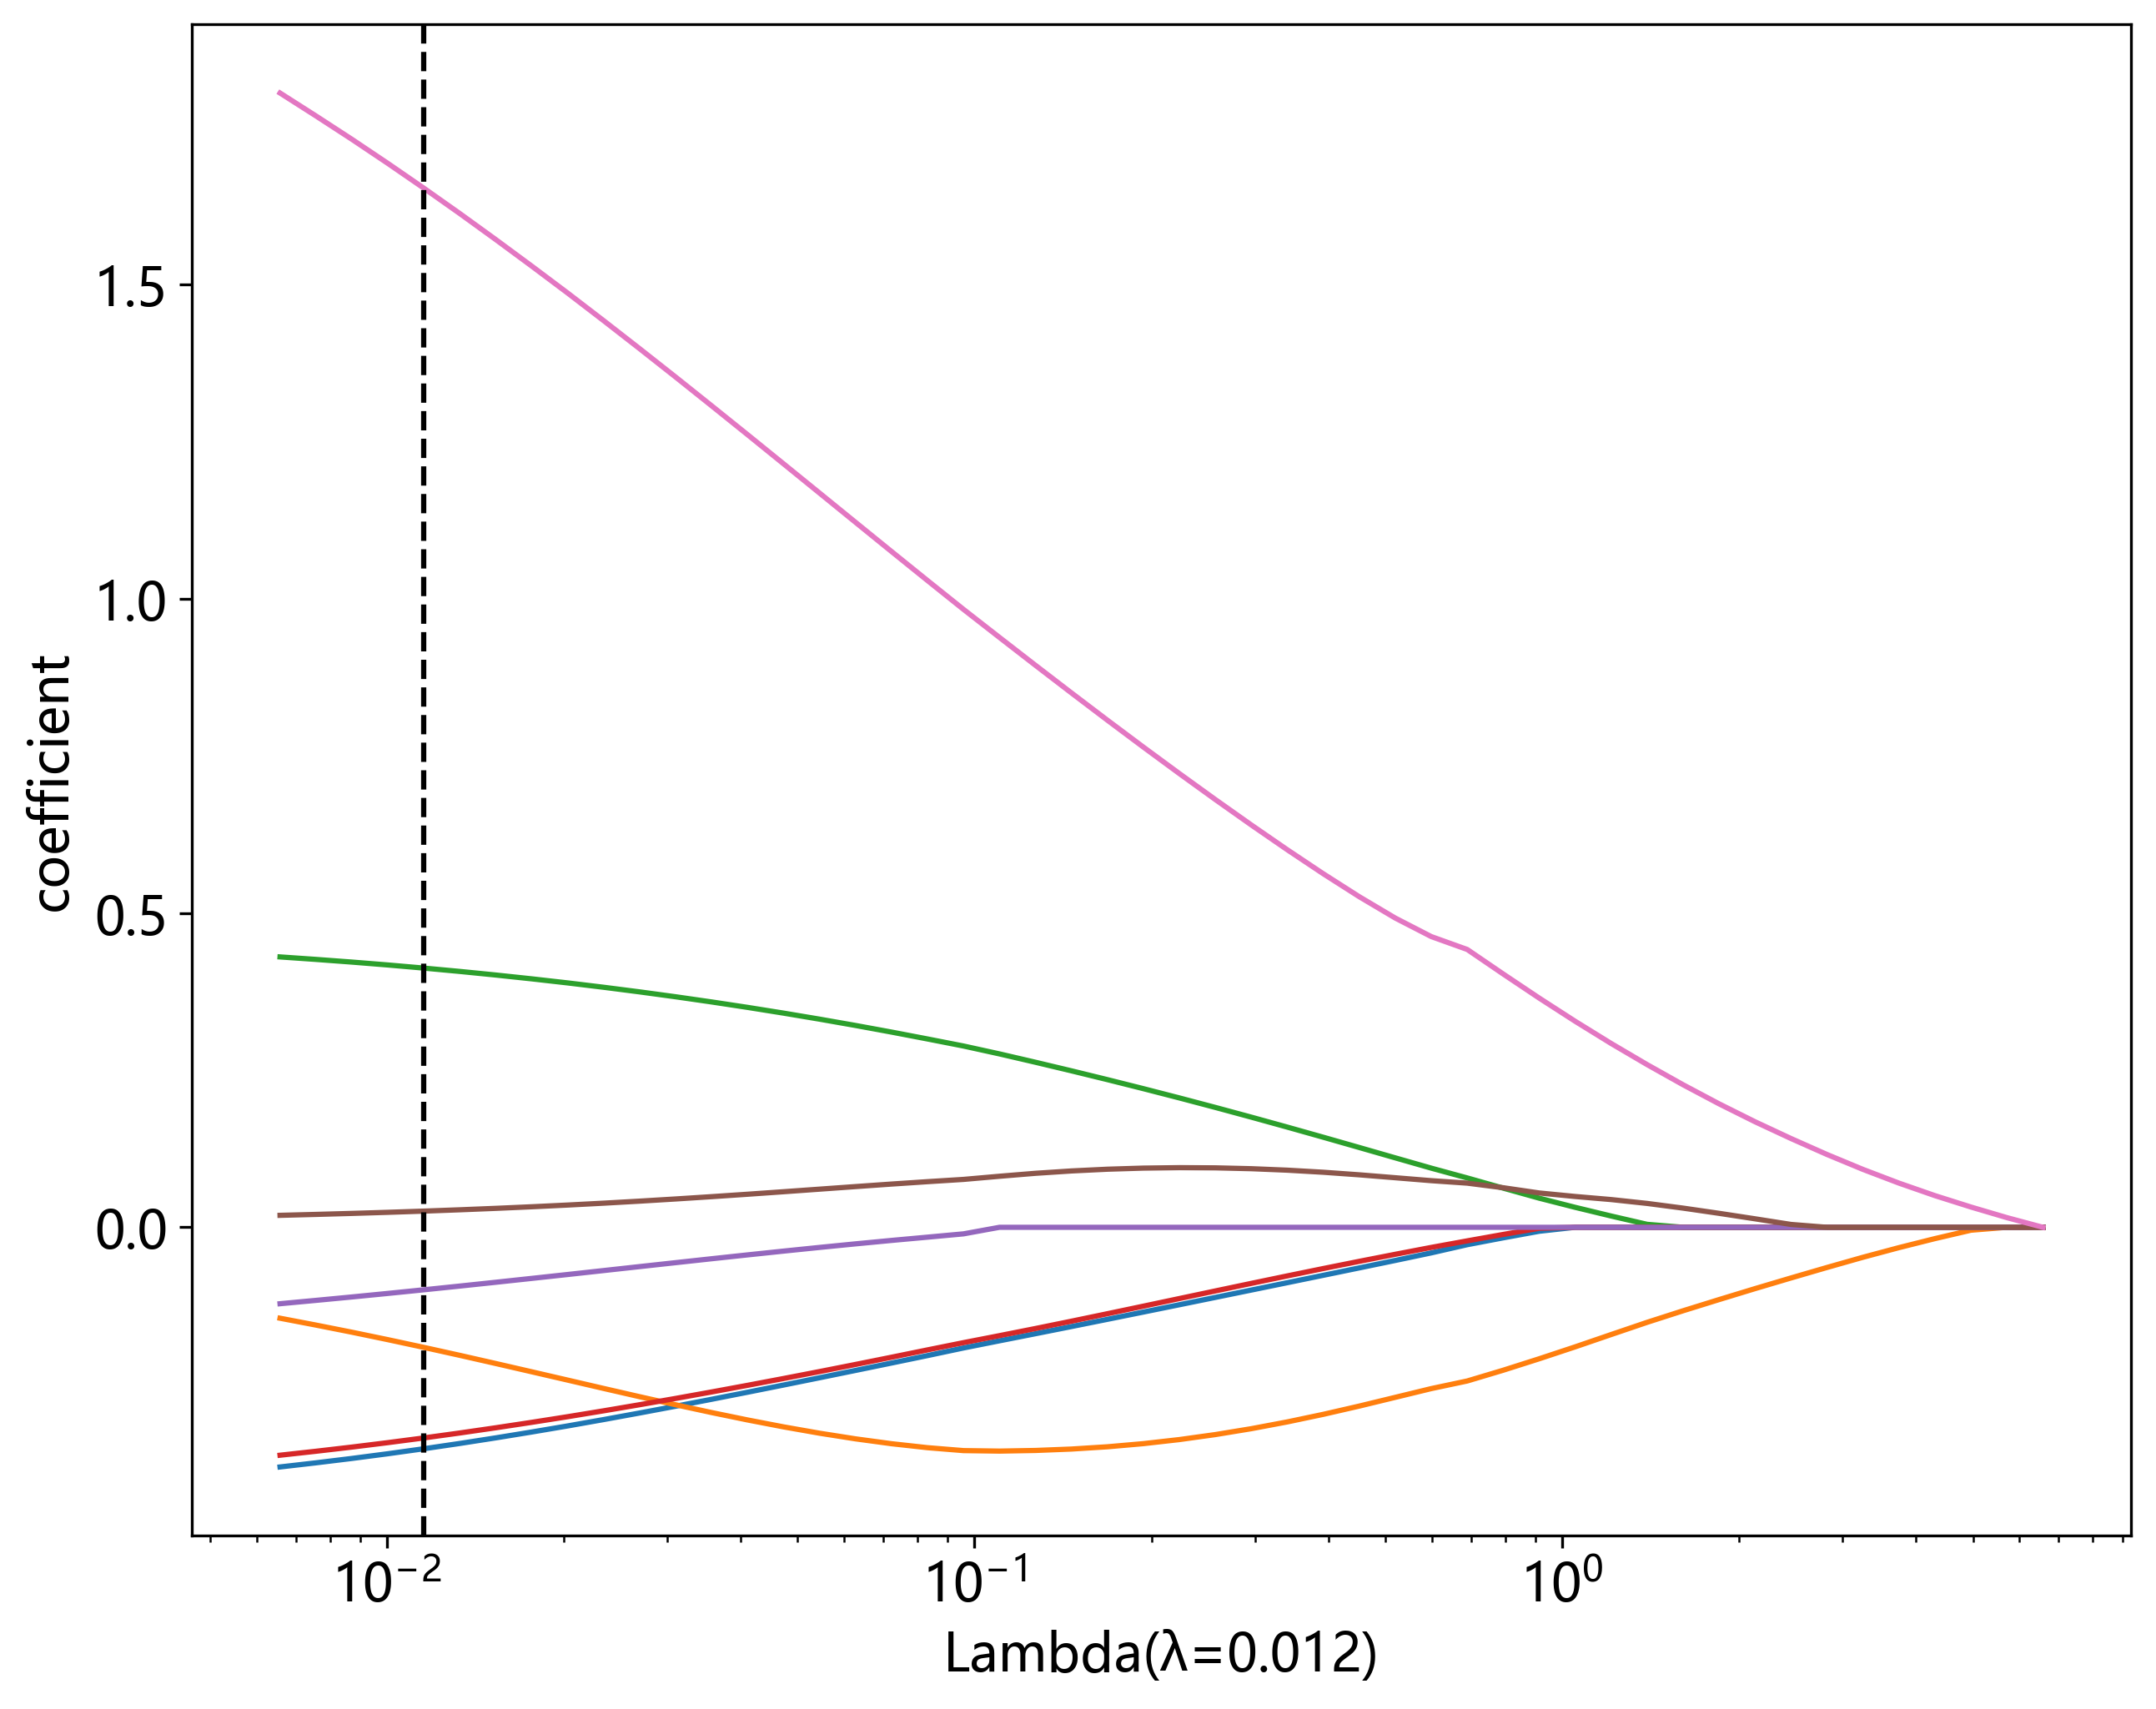

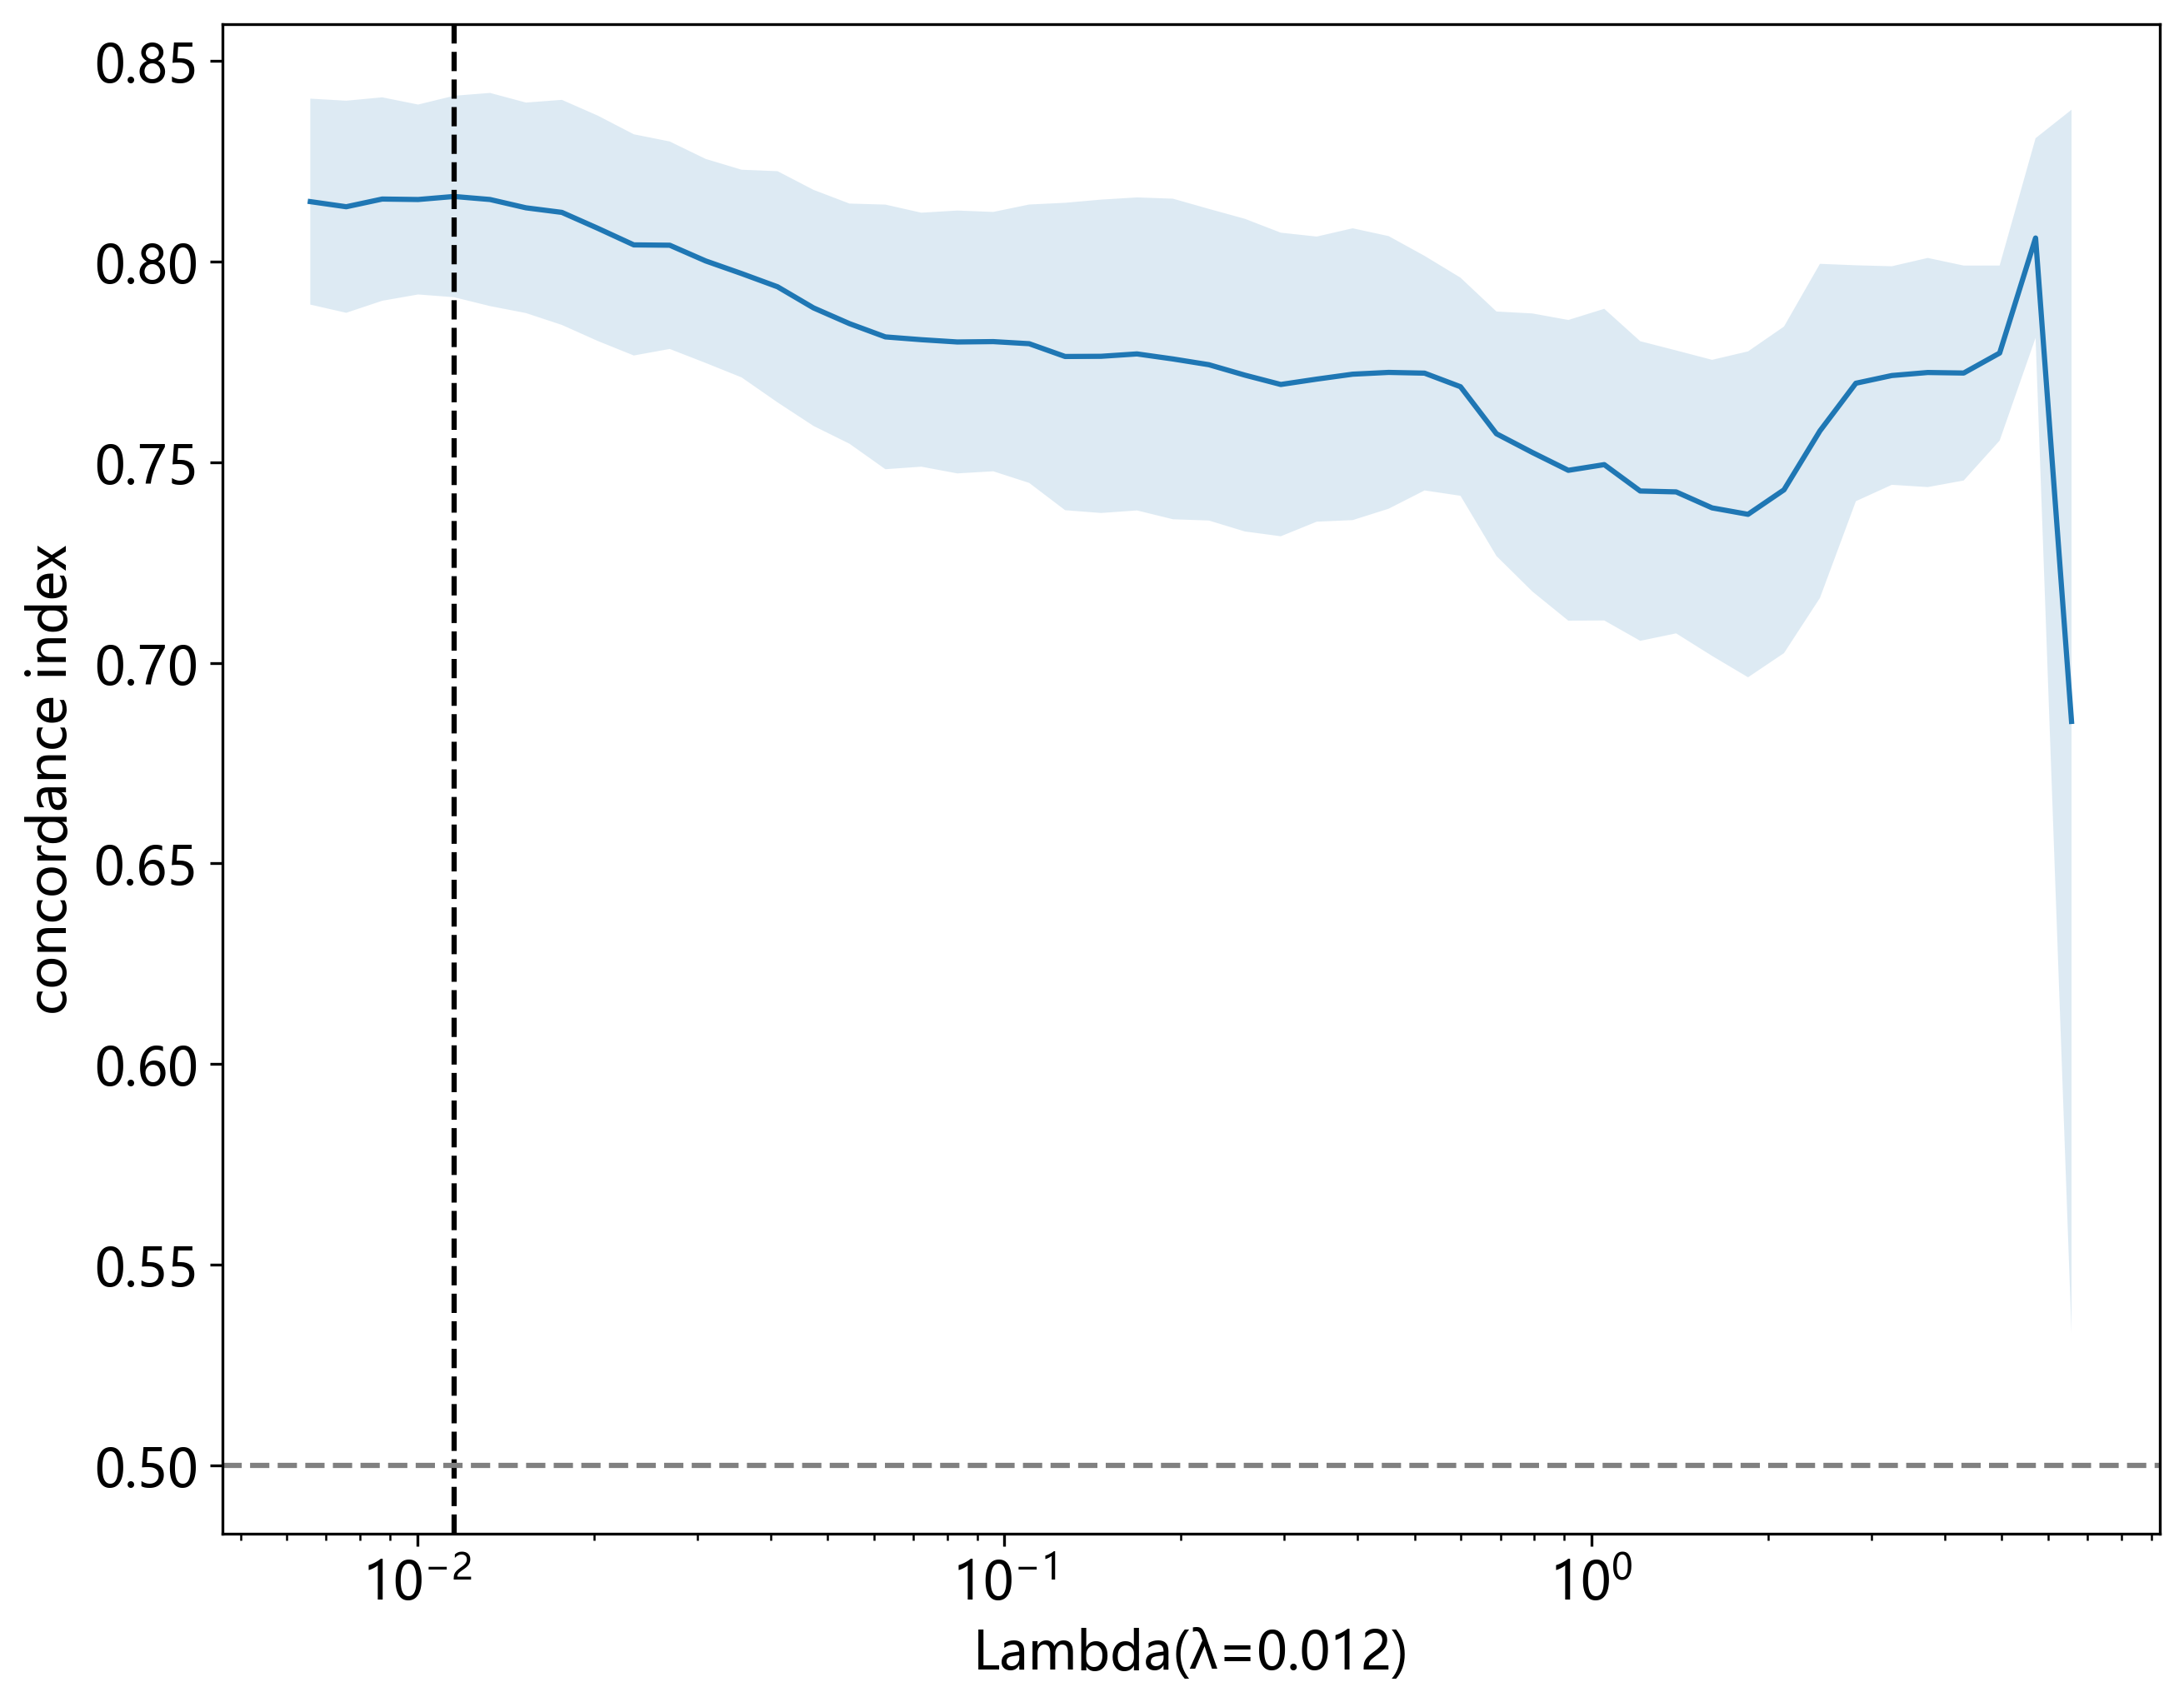

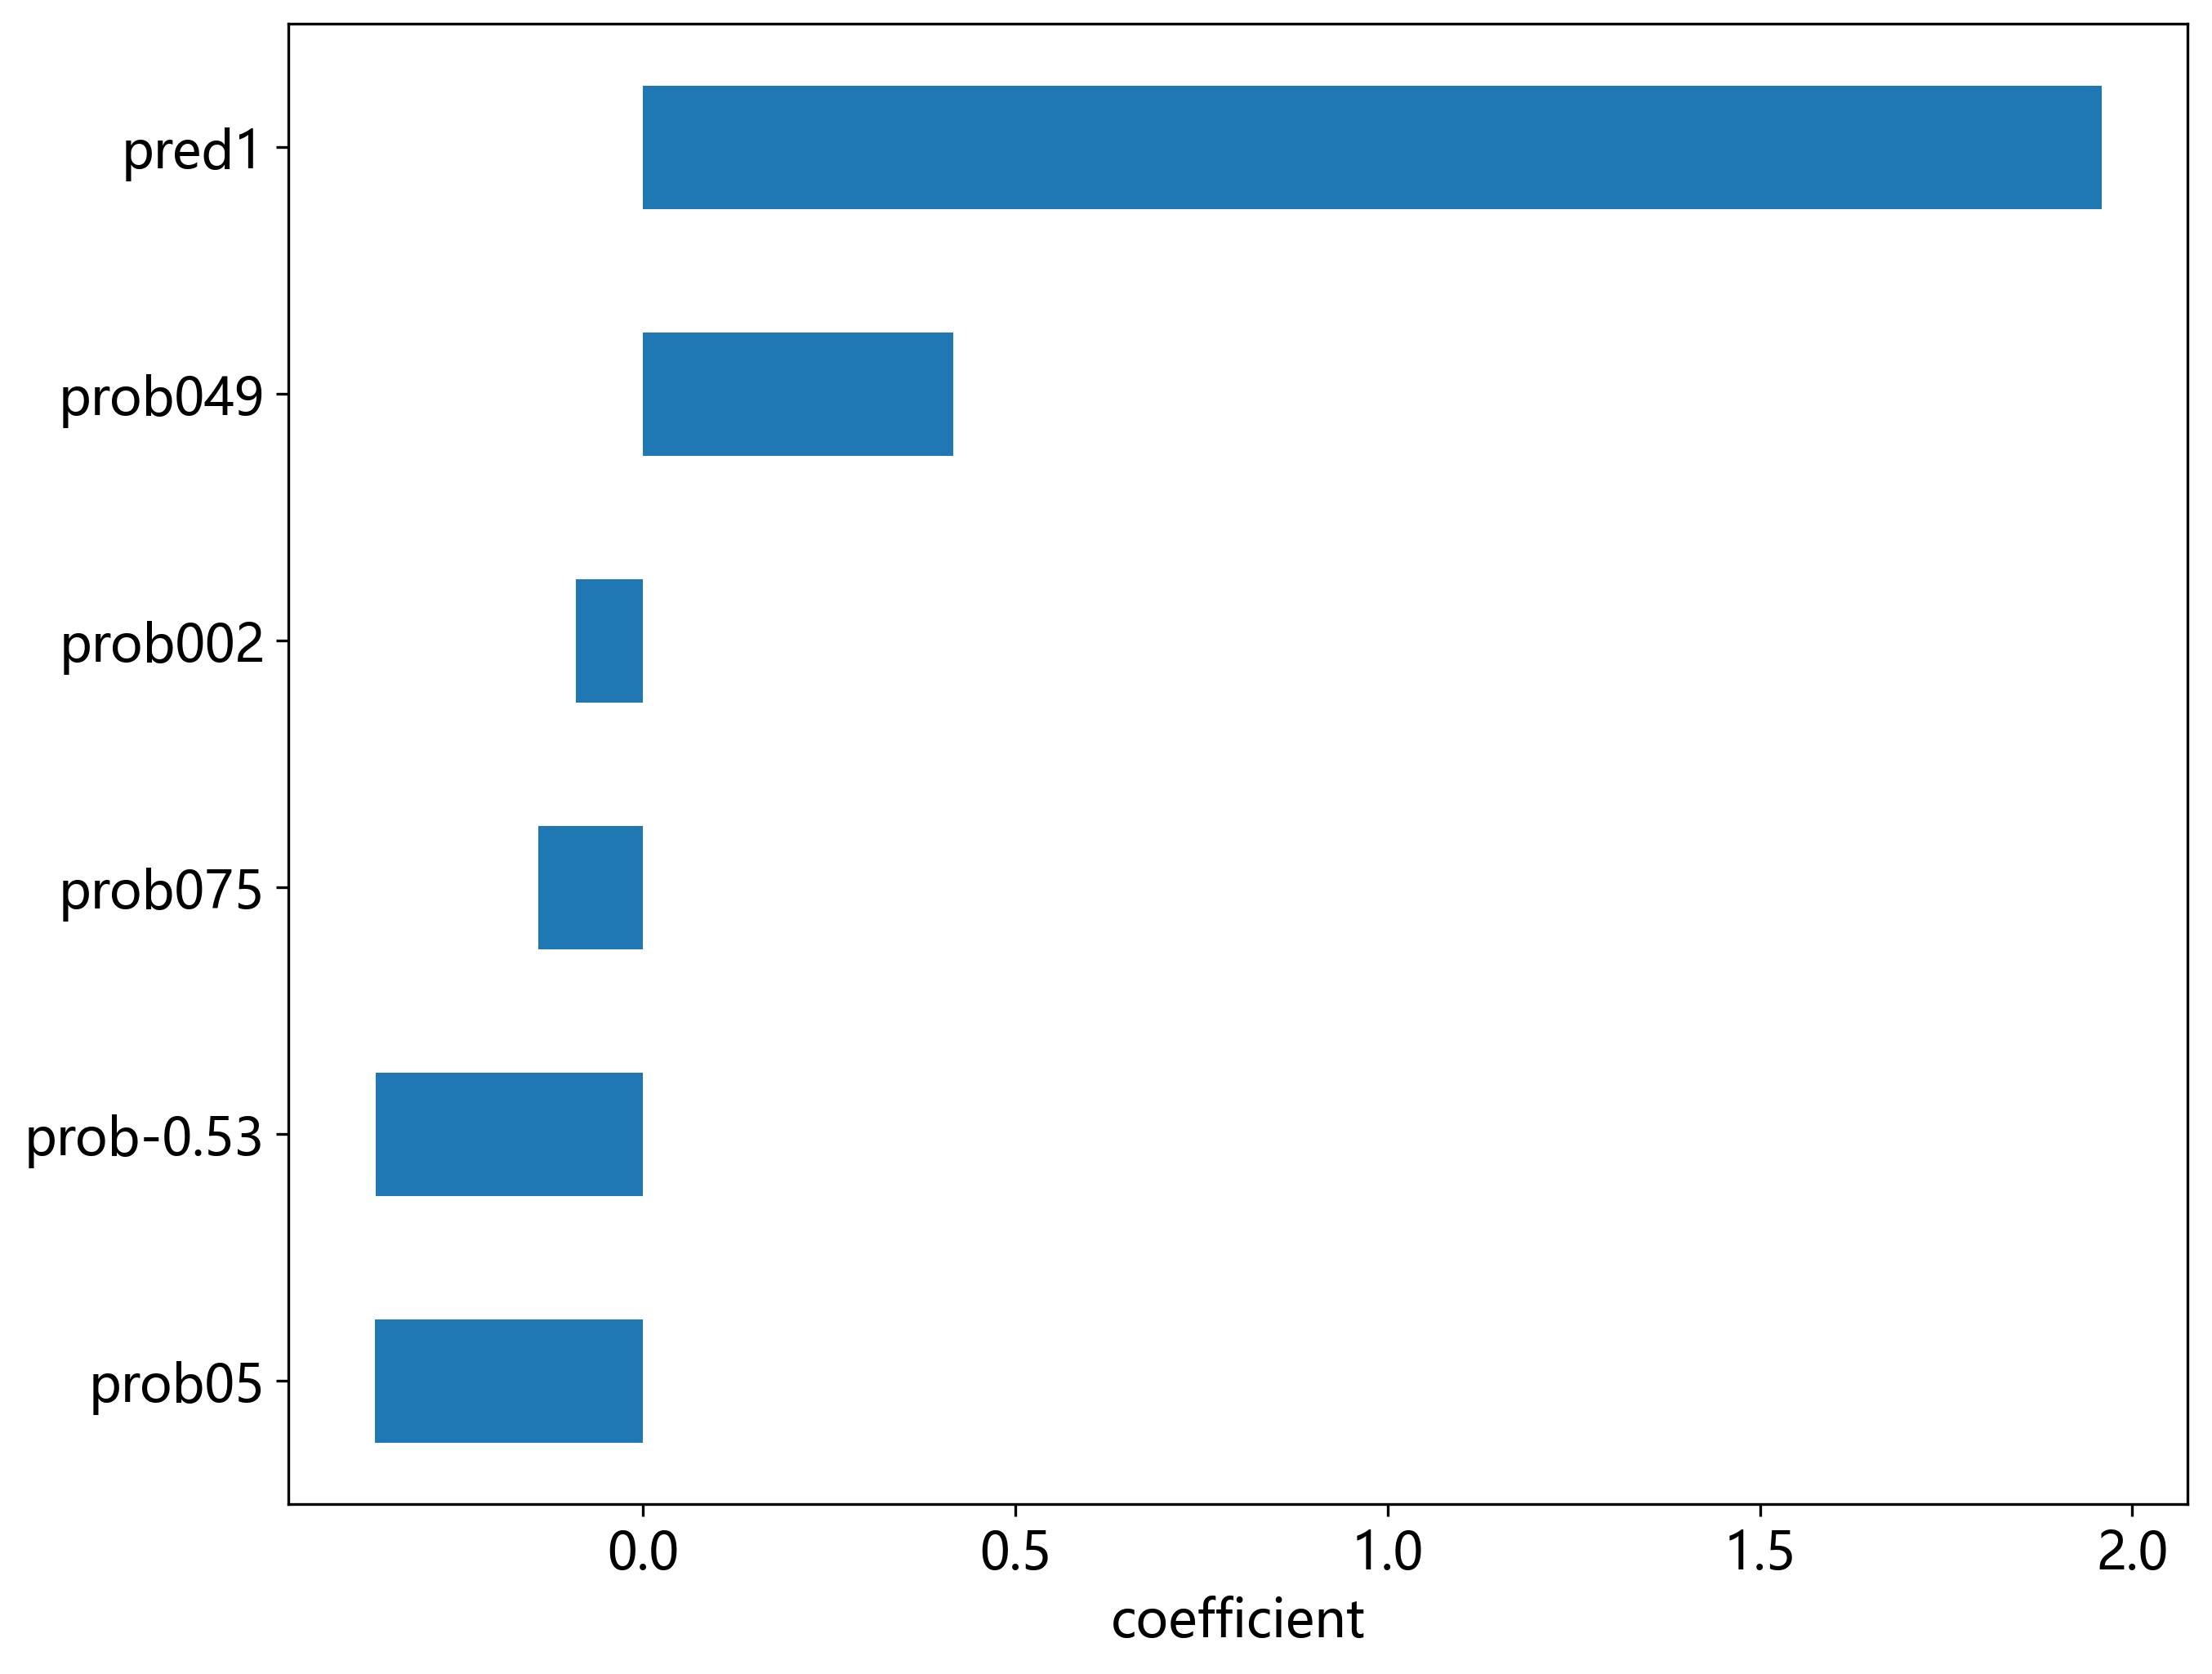

Survive = -0.359562 * prob05 -0.358203 * prob-0.53 -0.140451 * prob075 -0.090353 * prob002 +0.416976 * prob049 +1.958622 * pred1


In [24]:
from onekey_algo.custom.components.survival import get_x_y_survival, lasso_cox_cv
COEF_THRESHOLD = 1e-6

X, y = get_x_y_survival(train_data, val_outcome=1, event_col=event_col, duration_col=duration_col)
sel_features = lasso_cox_cv(X, y, max_iter=200,  norm_X=False, prefix=f"{task_type}", l1_ratio=0.1, cv=5, ppoints=50, alpha_logmin=-3)
# sel_features = lasso_cox_cv(X, y, max_iter=1000,  norm_X=False, prefix=f"{task}_", l1_ratio=0.8, cv=10)

In [25]:
train_data = train_data[['ID'] + list(sel_features.index) + [event_col, duration_col]]
for subset in subsets:
    val_datasets[subset] = val_datasets[subset][['ID'] + list(sel_features.index) + [event_col, duration_col]]
    val_datasets[subset].to_csv(f'features/{task_type}{subset}_cox.csv', index=False)

### 聚类分析

通过修改变量名，可以可视化不同相关系数下的相聚类分析矩阵。

注意：当特征特别多的时候（大于100），尽量不要可视化，否则运行时间会特别长。

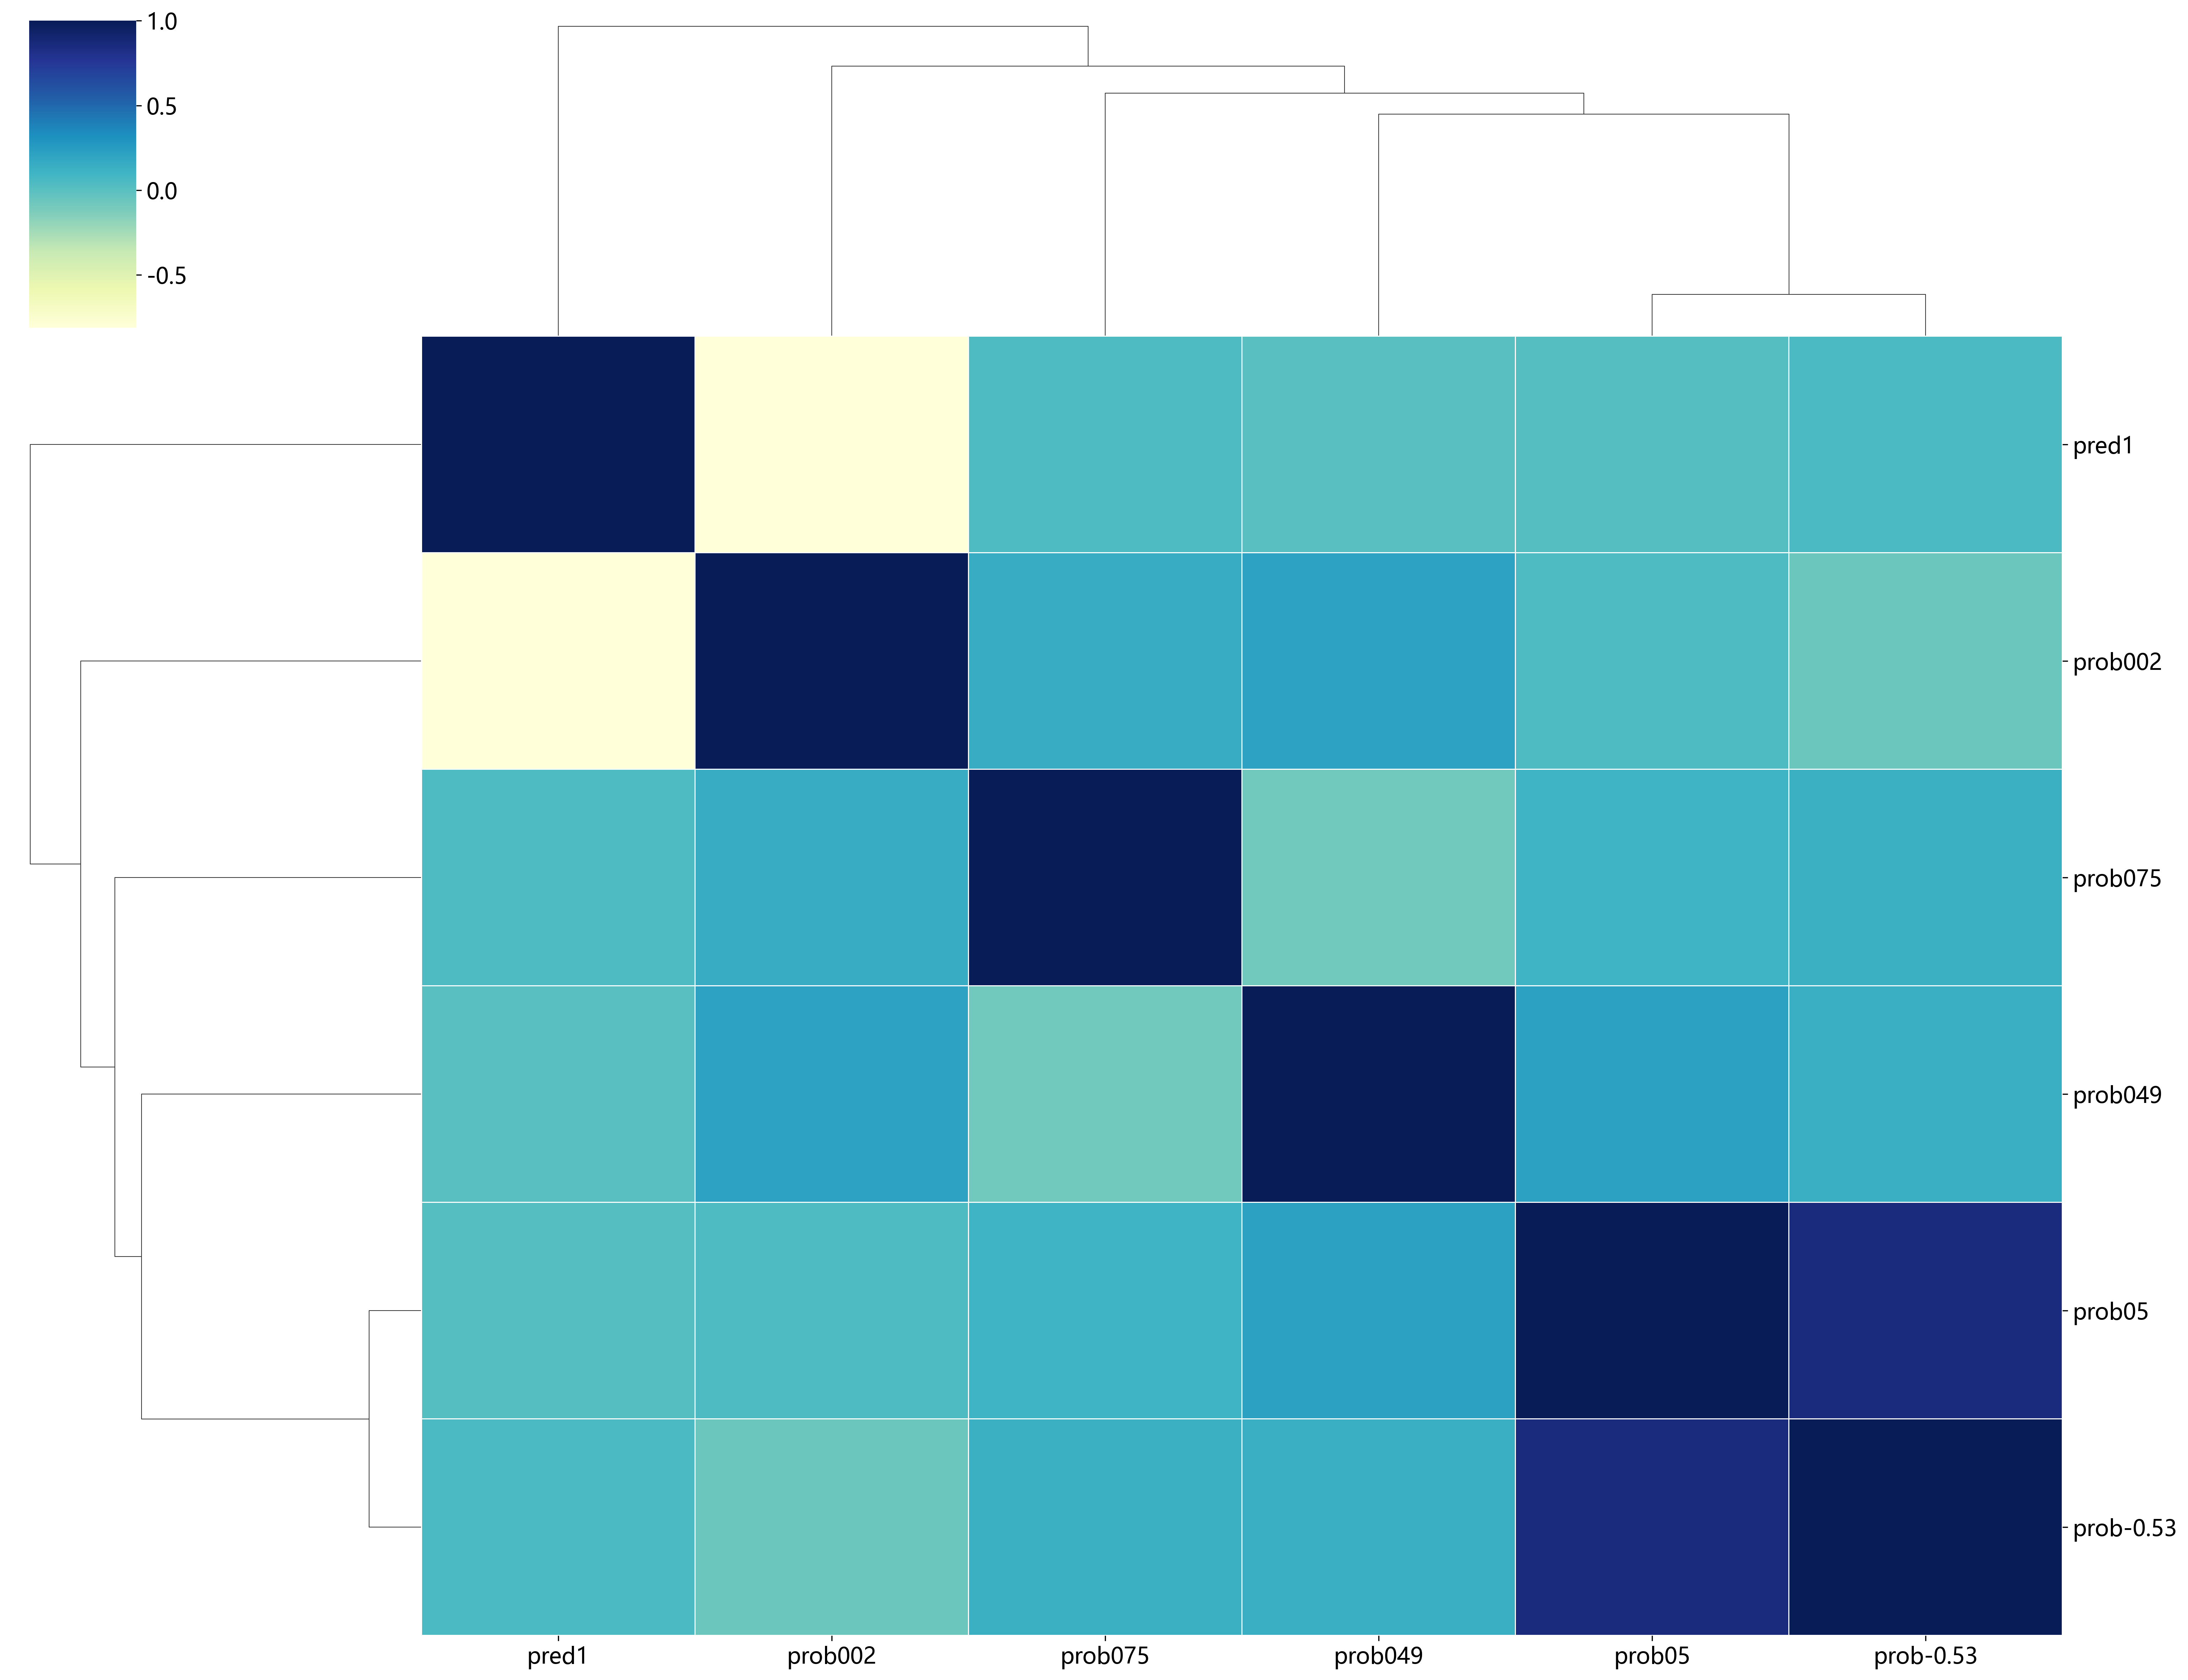

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

if train_data.shape[1] < 150:
    pp = sns.clustermap(train_data[[c for c in train_data.columns if c not in [event_col, duration_col, 'group']]].corr(corr_name), 
                        linewidths=.5, figsize=(20.0, 16.0), cmap='YlGnBu')
    plt.setp(pp.ax_heatmap.get_yticklabels(), rotation=0)
    plt.savefig(f'img/{task_type}feature_cluster.svg', bbox_inches = 'tight')

In [27]:
from lifelines import CoxPHFitter

cph = CoxPHFitter(penalizer=0.01)
cph.fit(train_data[[c for c in train_data.columns if c not in ['ID', 'group']]], duration_col=duration_col, event_col=event_col)
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 136 total observations, 30 right-censored observations>
             duration col = 'OSTime'
                event col = 'OS'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 136
number of events observed = 106
   partial log-likelihood = -350.03
         time fit was run = 2024-03-13 14:00:43 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
prob05     -0.42       0.66       0.25            -0.91             0.07                 0.40                 1.08
prob-0.53  -0.40       0.67       0.30            -0.99             0.19                 0.37                 1.21
prob075    -0.19       0.83       0.11            -0.40             0.02                 0.67                 1.02
prob002    -0.09       0.91       0.23            -0.54             0.35                 0.58                 1.43
prob049     0.45       1.56       0.16             0.13             0.76                 1.14                 2.14
pred1       2.44      11.47       0.40             1.65             3.23                 5.22                25.18

            cmp to     z      p   -log2(p)
covariate                                 
prob05        0.00 -1.67   0.10       3.38
prob-0.53     0.00 -1.32   0.19       2.41
prob075       0.00 -1.79   0.07       3.75
prob002       0.00 -0.41   0.68       0.55
prob049       0.00  2.80   0.01       7.62
pred1         0.00  6.08 <0.005      29.60
---
Concordance = 0.82
Partial AIC = 712.06
log-likelihood ratio test = 170.34 on 6 df
-log2(p) of ll-ratio test = 111.02

In [28]:
print(cph.concordance_index_)
su = cph.summary[['exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%', 'p']]
su.columns = ['HR', 'HR lower 95%', 'HR upper 95%', 'pvalue']
su.reset_index().to_csv(f'features/{task_type}_features_HR.csv', index=False)
su

0.8211972013474994


,HR,HR lower 95%,HR upper 95%,pvalue
covariate,,,,
prob05,0.658,0.403,1.077,9.585e-02
prob-0.53,0.673,0.372,1.215,1.885e-01
prob075,0.826,0.669,1.019,7.419e-02
prob002,0.911,0.582,1.426,6.828e-01
prob049,1.564,1.144,2.138,5.081e-03
pred1,11.465,5.220,25.180,1.225e-09


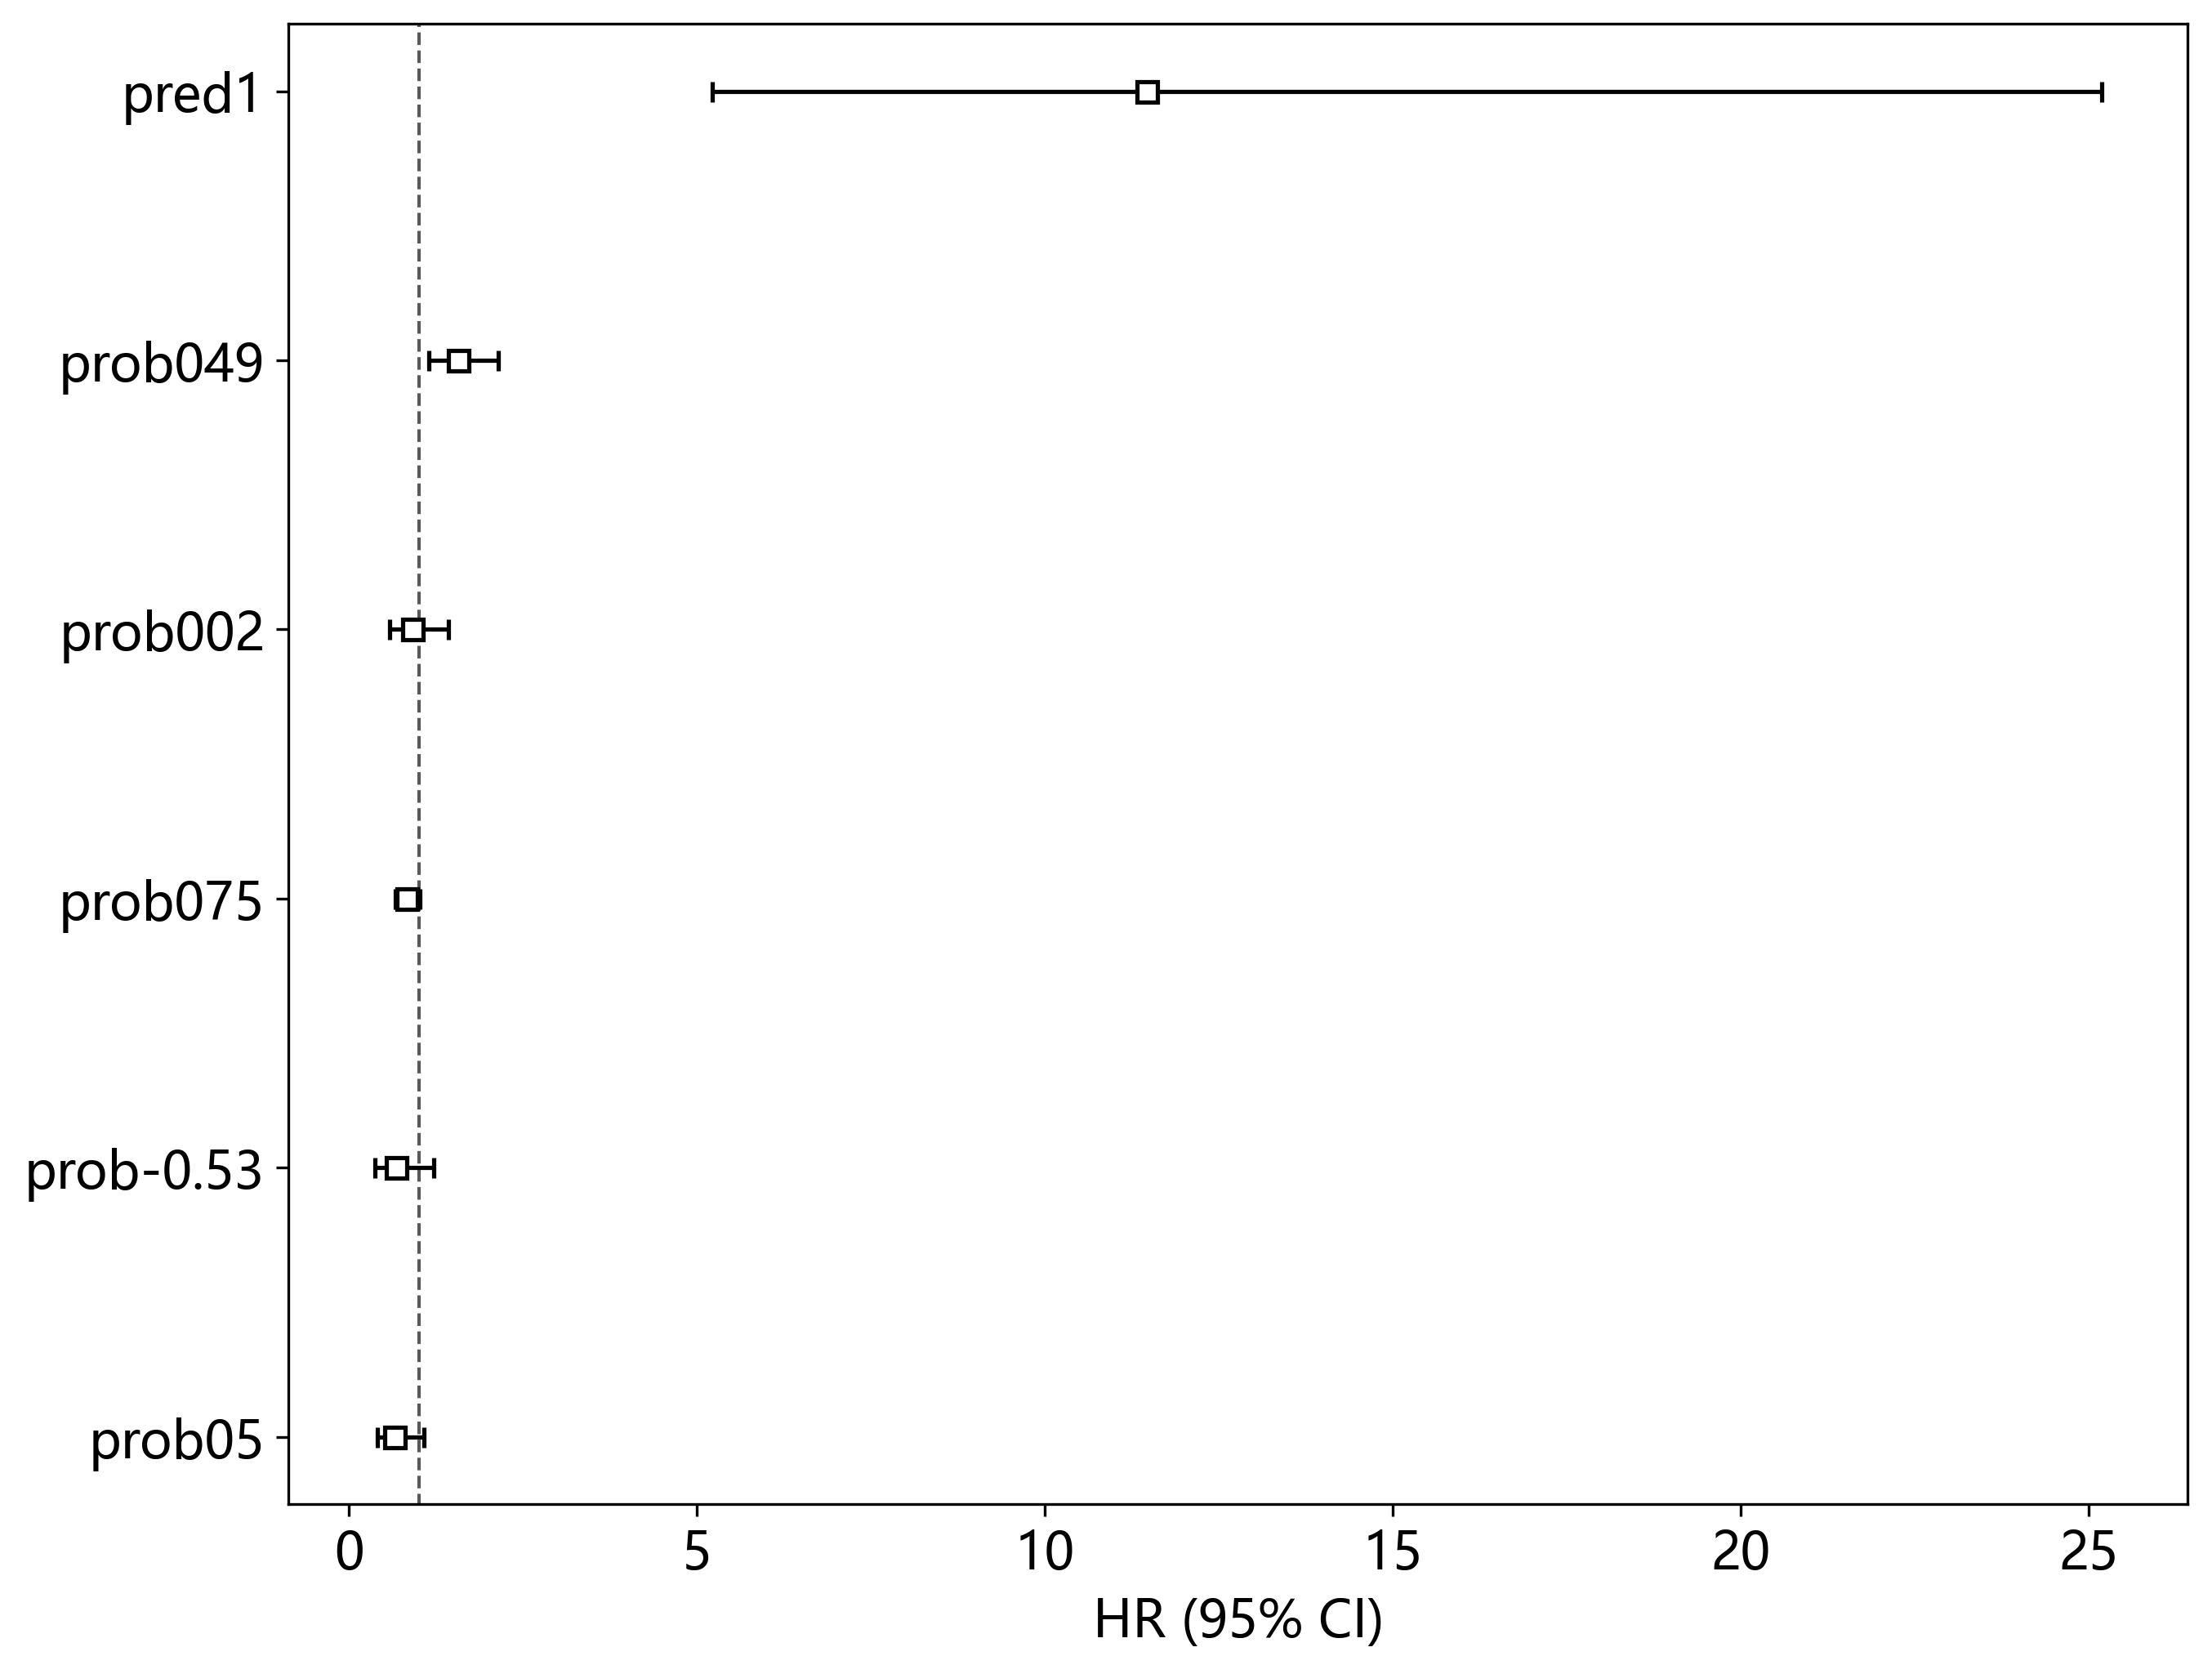

In [29]:
import matplotlib.pyplot as plt

cph.plot(hazard_ratios=True)
plt.savefig(f'img/{task_type}feature_pvalue.svg')
plt.show()

In [30]:
from onekey_algo.custom.components.ugly import drop_survival

def get_sel(cox_data, cph, drop_num):
    kid = drop_survival(cox_data, cph, drop_num=drop_num, is_drop_ids=False)
    print(set(cox_data['ID']) - set(kid['ID']))
    cox_data = pd.merge(cox_data, kid[['ID']], on='ID', how='inner')
    return cox_data
for dn, subset in [(0, 'test')]:
    val_datasets[subset] = get_sel(val_datasets[subset][[c for c in val_datasets[subset].columns if c not in ['group']]], cph, dn)

set()


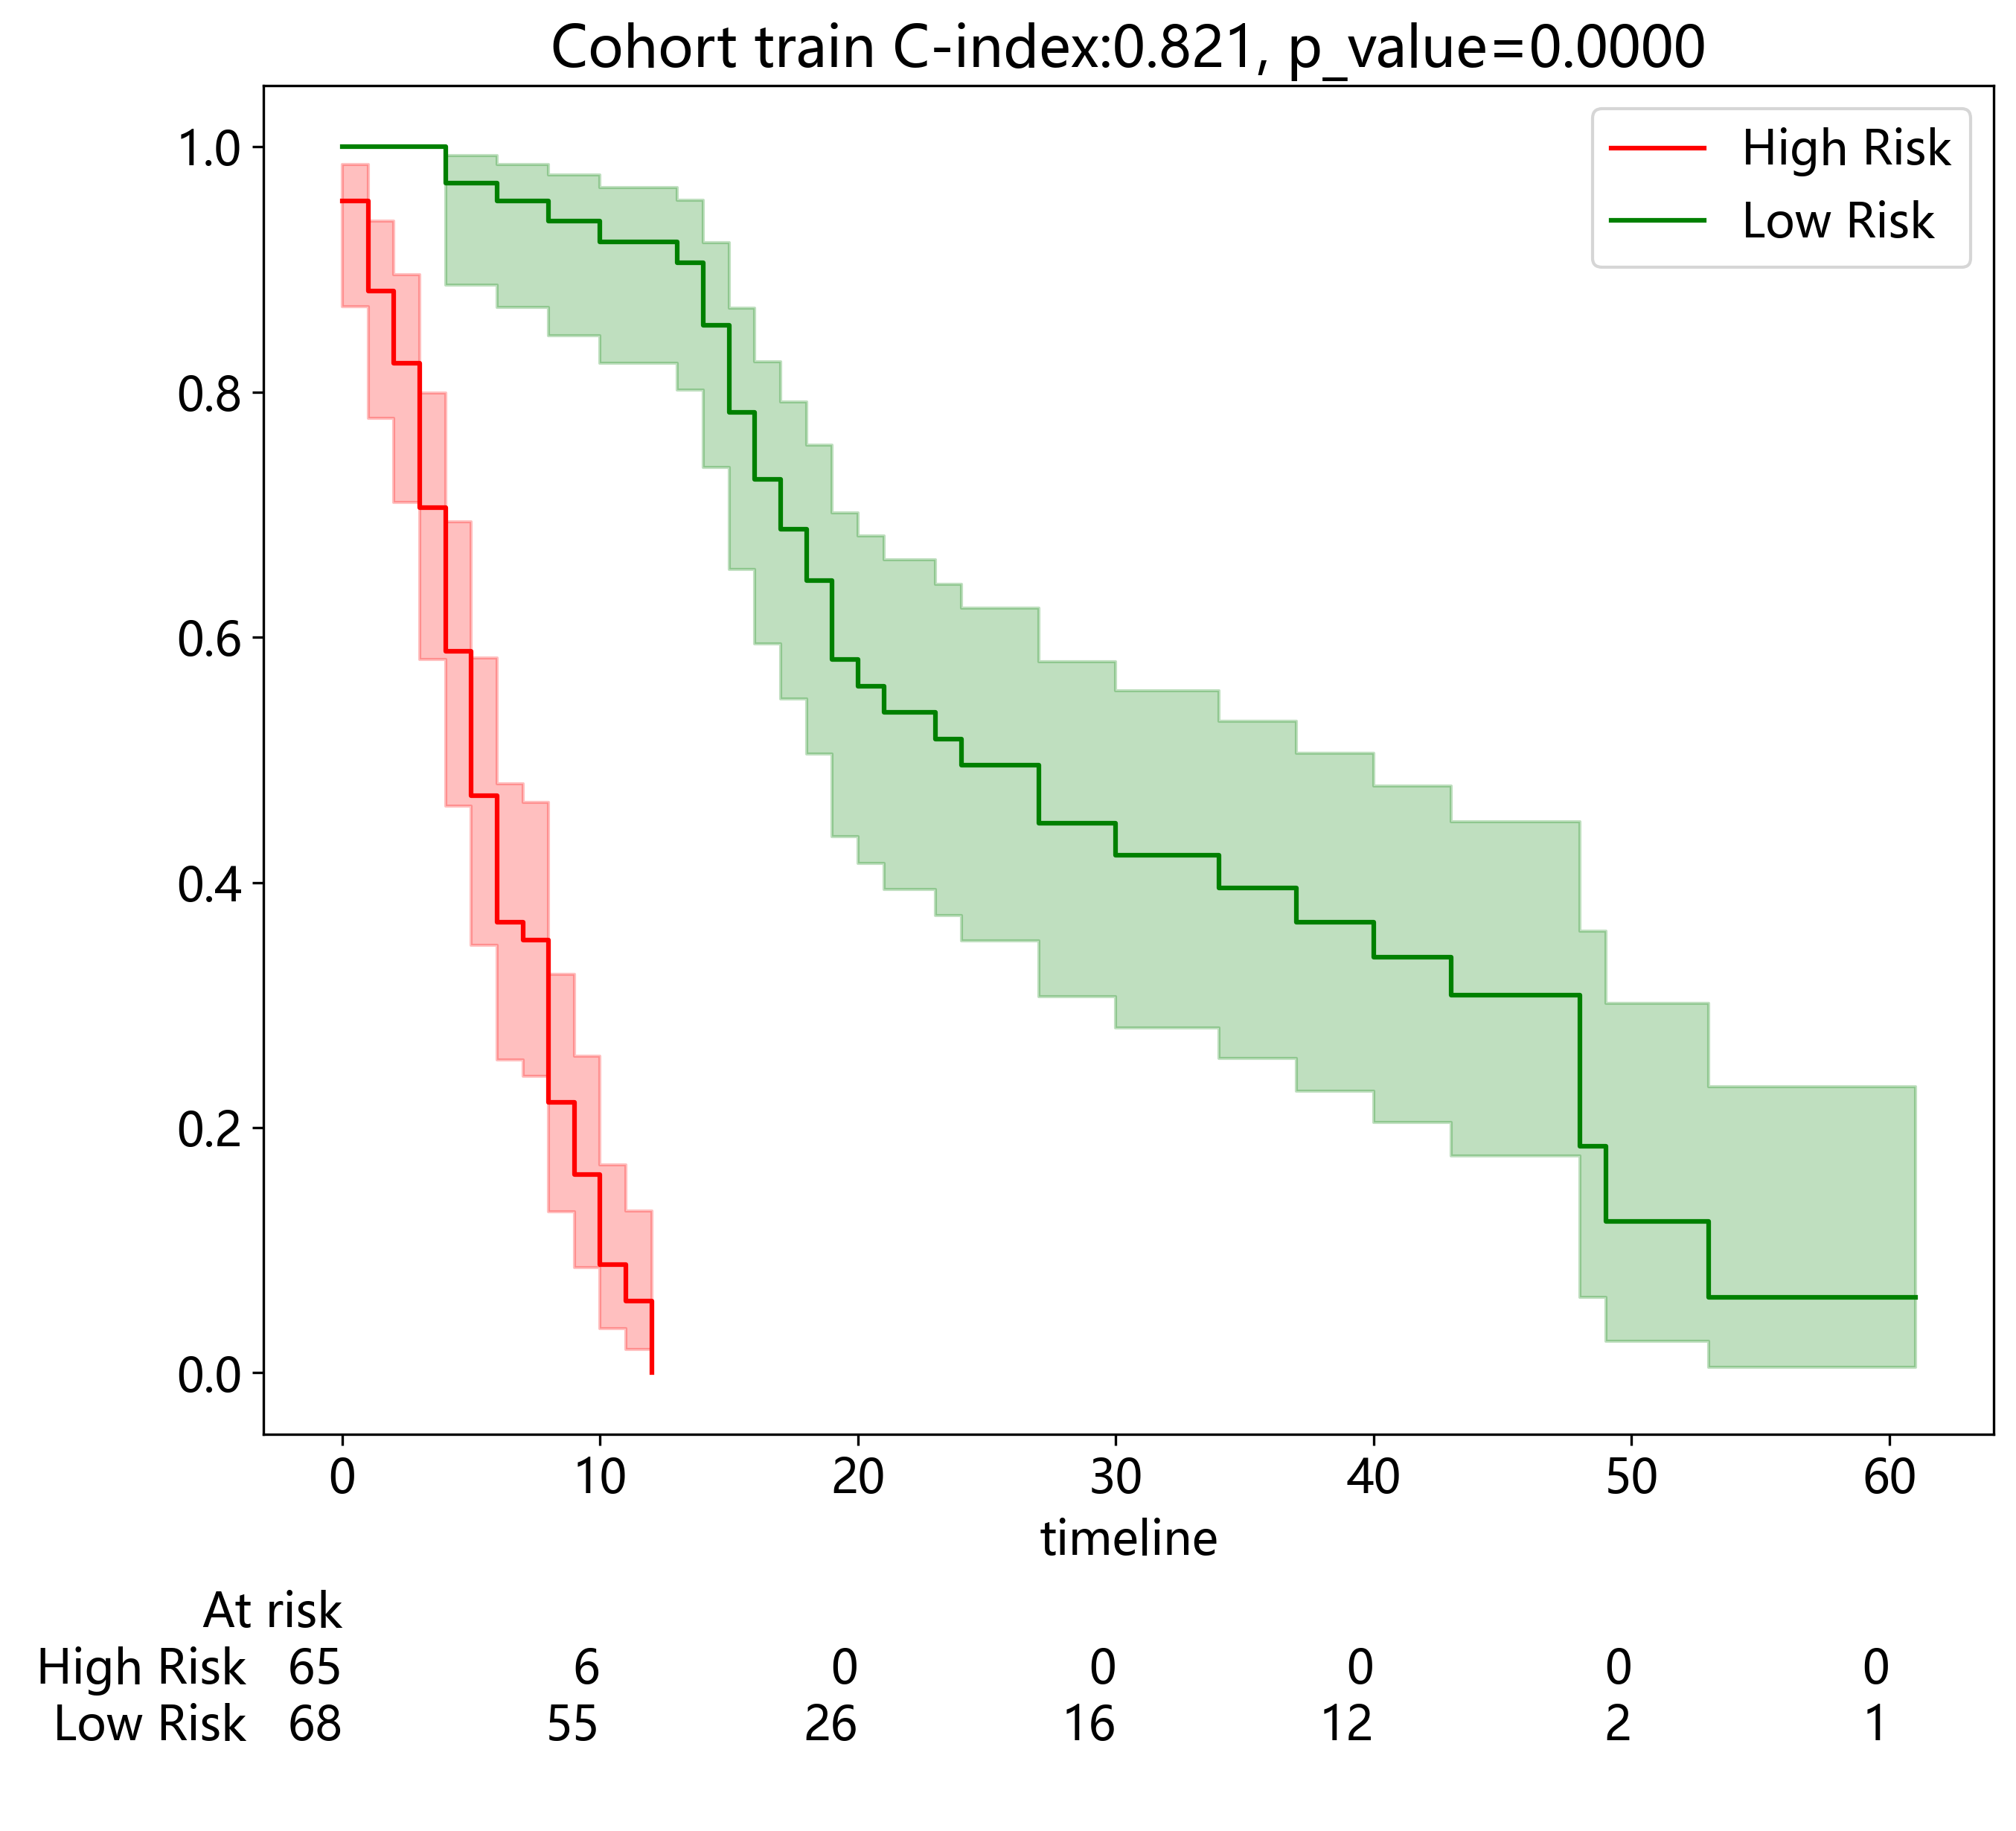

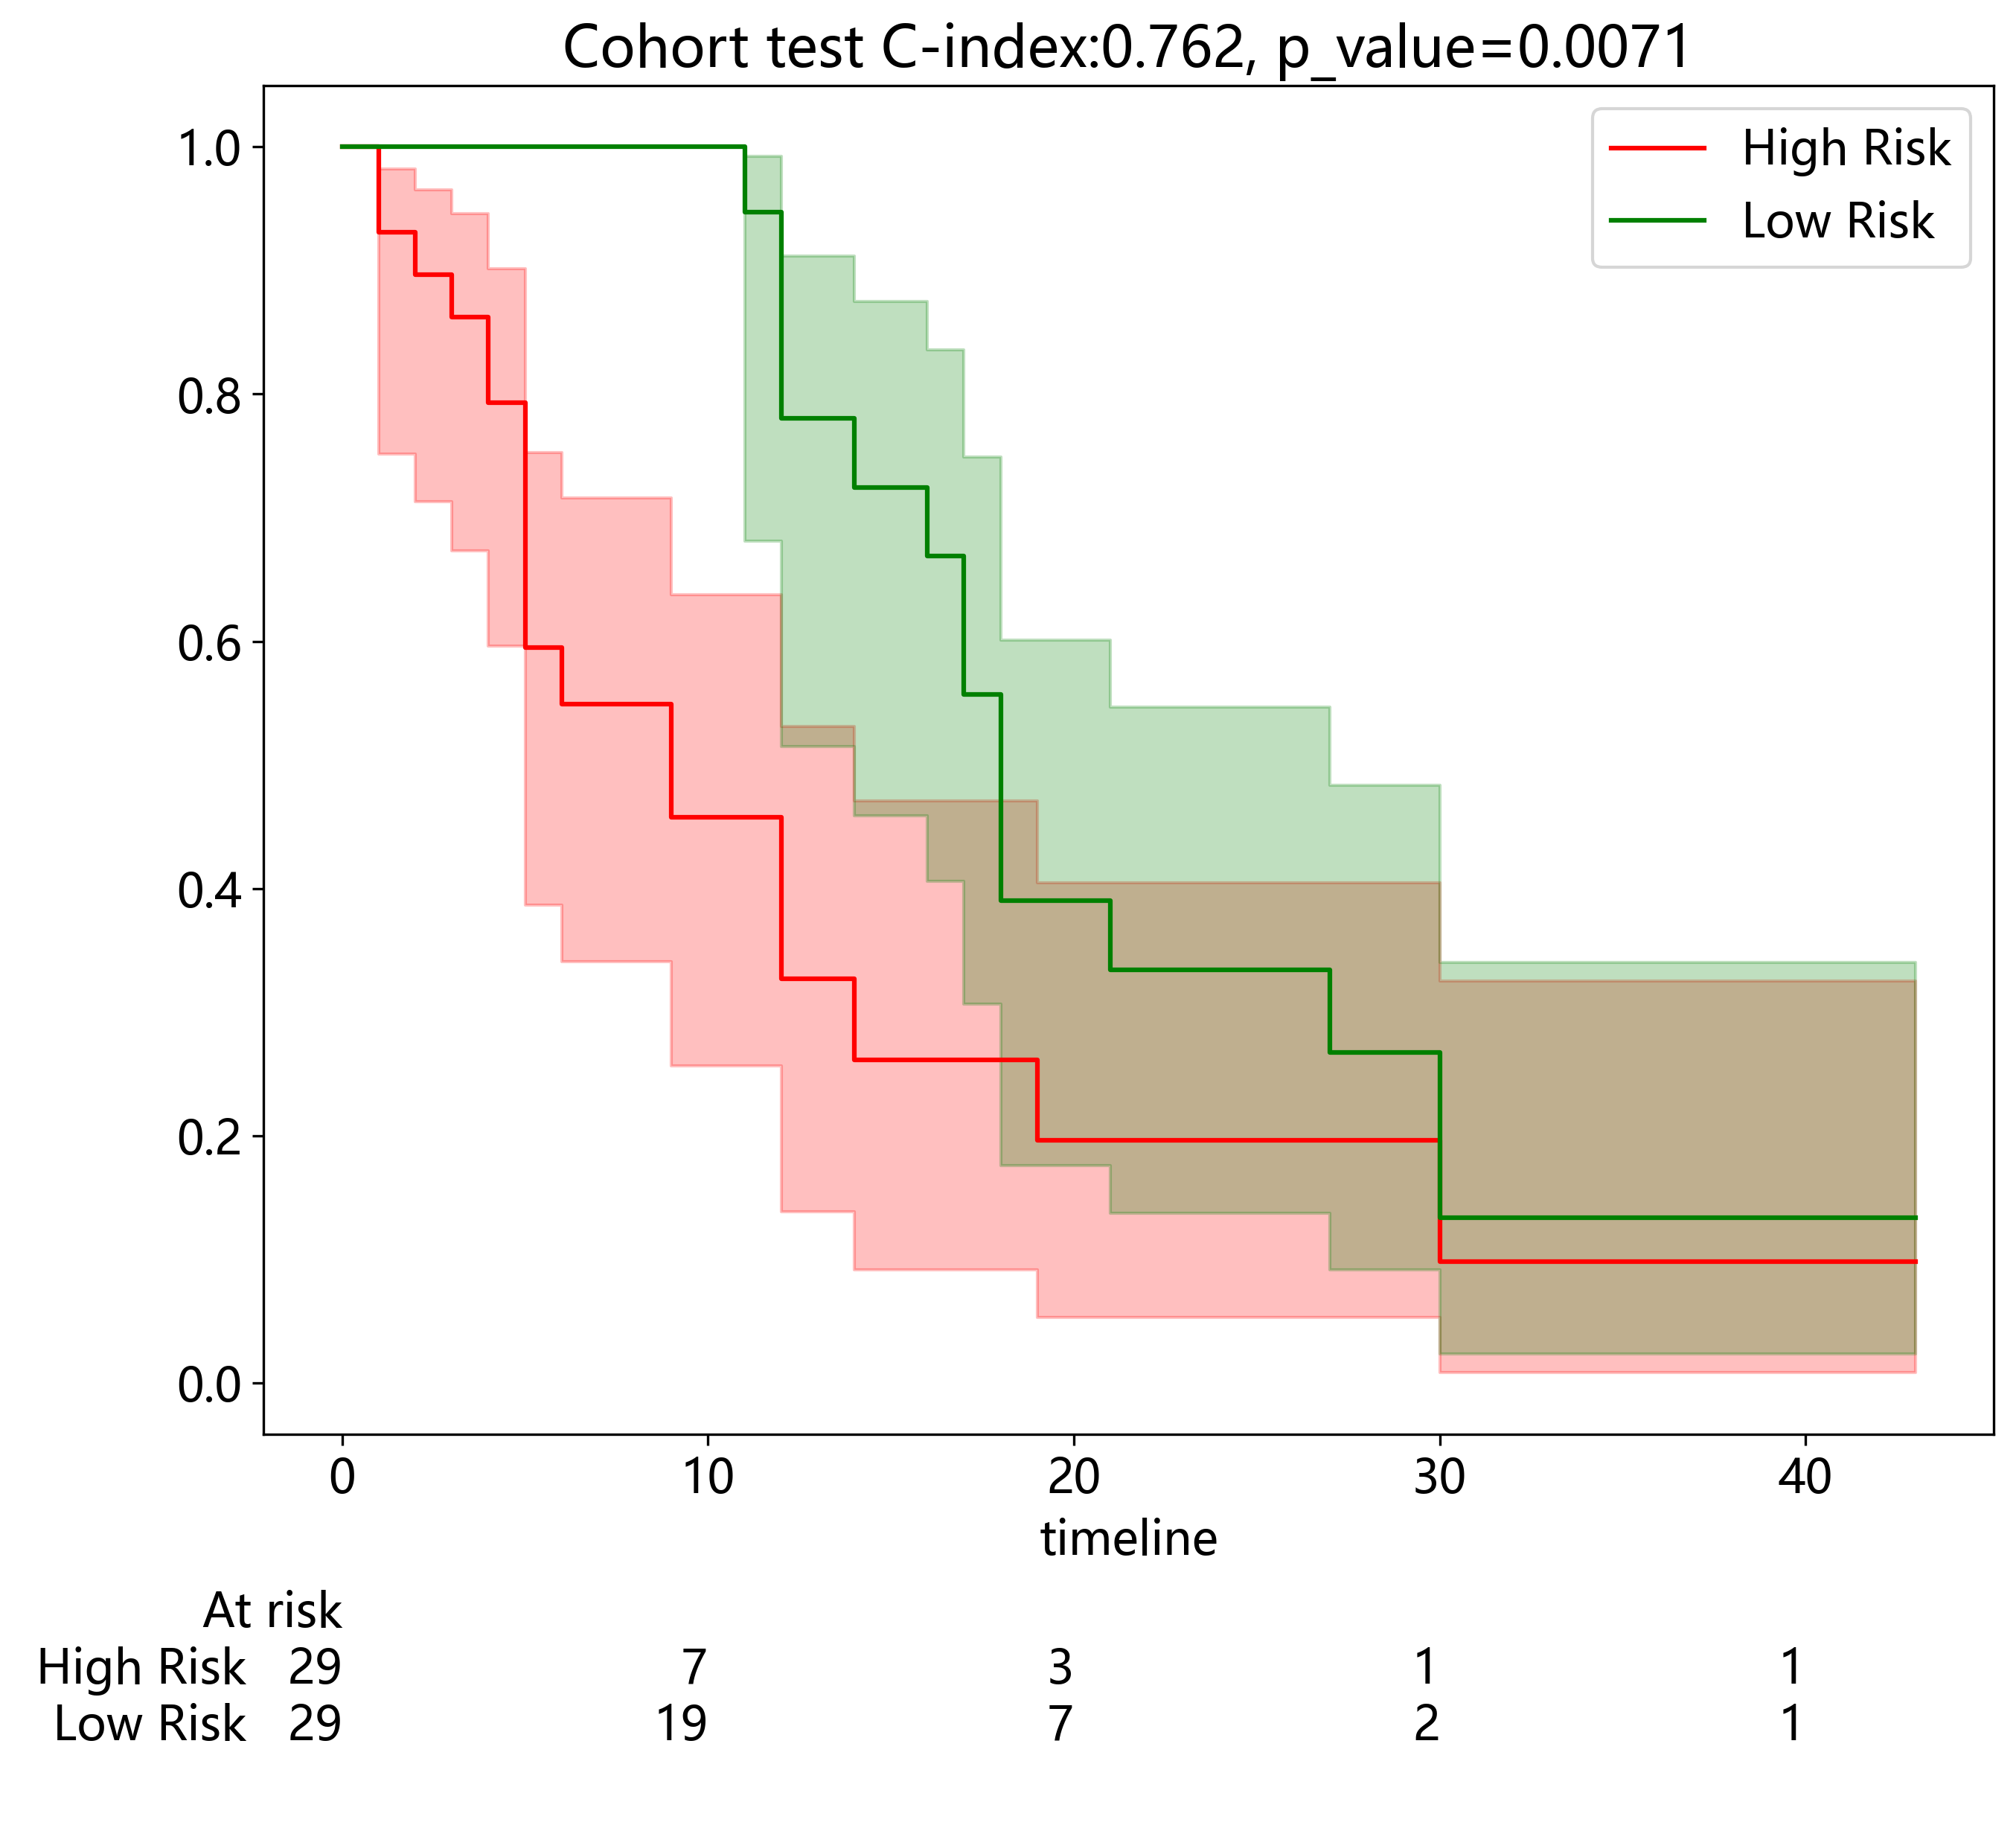

In [31]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts

for subset, test_data in val_datasets.items():
    if subset == 'test_ex':
        continue
    c_index = cph.score(test_data[[c for c in test_data.columns if c not in ['ID', 'group']]], scoring_method="concordance_index")
#     y_pred = cph.predict_median(test_data[[c for c in test_data.columns if c != 'ID']])
#     cox_data = pd.concat([test_data, y_pred], axis=1)
#     mean = cox_data.describe()[0.5]['mean']
#     cox_data['HR'] = cox_data[0.5] < mean
    y_pred = cph.predict_partial_hazard(test_data[[c for c in test_data.columns if c != 'ID']])
    cox_data = pd.concat([test_data, y_pred], axis=1)
    mean = cox_data.describe()[0]['50%']
    cox_data['HR'] = cox_data[0] > mean
#     cox_data['HR'] = cox_data[0] > 1

    dem = (cox_data["HR"] == True)
    results = logrank_test(cox_data[duration_col][dem], cox_data[duration_col][~dem], 
                           event_observed_A=cox_data[event_col][dem], event_observed_B=cox_data[event_col][~dem])
    p_value = results.p_value
    plt.title(f"Cohort {subset} C-index:{c_index:.3f}, p_value={p_value:.4f}")
    if sum(dem):
        kmf_high = KaplanMeierFitter()
        kmf_high.fit(cox_data[duration_col][dem], event_observed=cox_data[event_col][dem], label="High Risk")
        kmf_high.plot_survival_function(color='r')
    if sum(~dem):
        kmf_low = KaplanMeierFitter()
        kmf_low.fit(cox_data[duration_col][~dem], event_observed=cox_data[event_col][~dem], label="Low Risk")
        kmf_low.plot_survival_function(color='g')
    add_at_risk_counts(kmf_high, kmf_low, rows_to_show=['At risk'])
    plt.savefig(f'img/{task_type}KM_{subset}.svg', bbox_inches='tight')
    plt.show()

In [34]:
import os
import numpy as np

def get_prediction(model: CoxPHFitter, data, ID=None, **kwargs):
    hr = model.predict_partial_hazard(data)
    expectation = model.predict_expectation(data)
    
    predictions = pd.concat([hr, expectation], axis=1)
    predictions.columns = ['HR', 'expectation']
    if ID is not None:
        predictions = pd.concat([ID, hr, expectation], axis=1)
        predictions.columns = ['ID', 'HR', 'expectation']
    else:
        predictions = pd.concat([hr, expectation], axis=1)
        predictions.columns = ['HR', 'expectation']
    return predictions
os.makedirs('results', exist_ok=True)
kids = []
for subset, test_data in val_datasets.items():
    results = get_prediction(cph, test_data, ID=test_data['ID'])
    results.to_csv(f'../results/{task_type}cox_predictions_{subset}.csv', index=False)
    results['group'] = subset
    kids.append(results[['ID', 'group']])

In [35]:
pd.concat(kids, axis=0).to_csv('data/path_ids.csv', index=False)